### UNI: bl2791 
### Name: Boyu Liu

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import warnings to ignore warning.
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("data/fire_nrt_V1_96617.csv")

# Task 1: Density Plots
### 1.1  Plot the latitude vs longitude several ways within a single figure (each in its own axes)

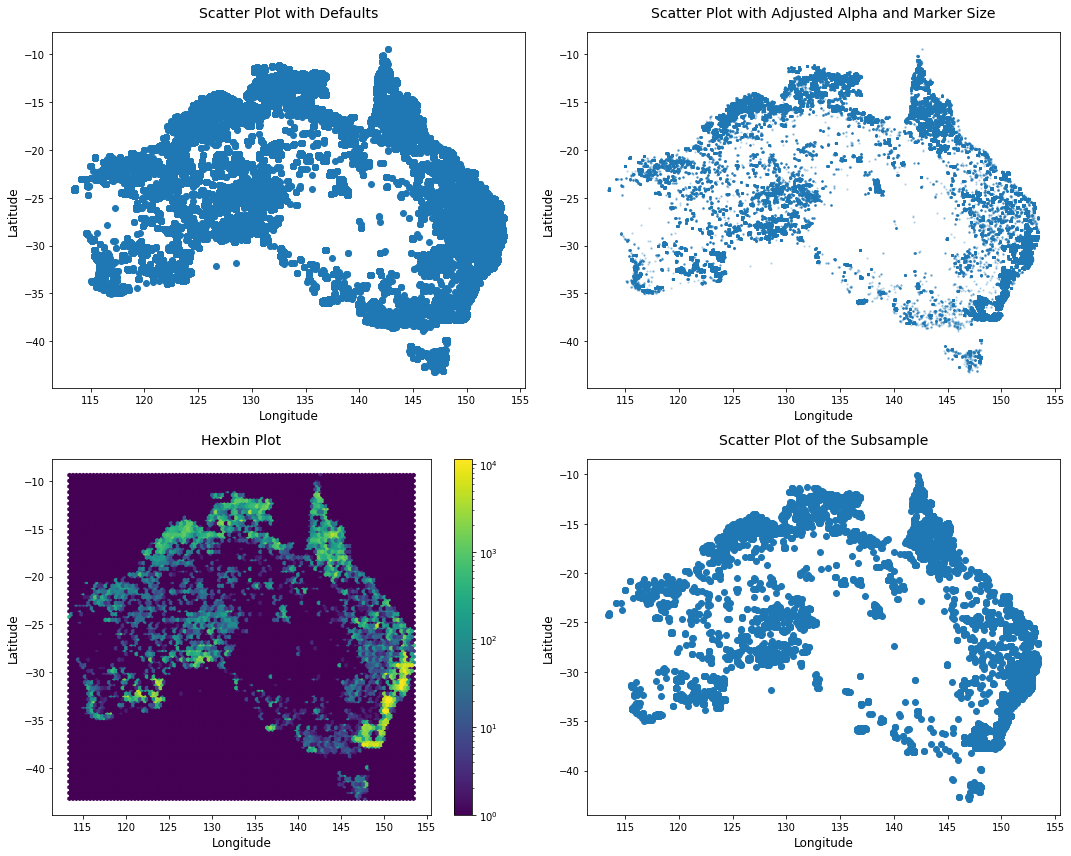

In [3]:
# Create a 2 x 2 figure, the size of which is (10, 8).
fig, ax = plt.subplots(2, 2, figsize = (15, 12))  

# Task 1.1 (1)
ax1 = ax[0, 0].scatter(df.longitude, df.latitude) 
ax[0, 0].set_title('Scatter Plot with Defaults', fontsize = 14, pad = 15)
ax[0, 0].set_xlabel("Longitude", fontsize = 12)
ax[0, 0].set_ylabel("Latitude", fontsize = 12)

# Task 1.1 (2)
ax2 = ax[0, 1].scatter(df.longitude, df.latitude, s = 2, alpha = 0.2)
ax[0, 1].set_title('Scatter Plot with Adjusted Alpha and Marker Size', fontsize = 14, pad = 15)
ax[0, 1].set_xlabel("Longitude", fontsize = 12)
ax[0, 1].set_ylabel("Latitude", fontsize = 12)

# Task 1.1 (3)
ax3 = ax[1, 0].hexbin(df.longitude, df.latitude, bins = 'log')  
fig.colorbar(ax3, ax = ax[1, 0])
ax[1, 0].set_title('Hexbin Plot', fontsize = 14, pad = 15)
ax[1, 0].set_xlabel("Longitude", fontsize = 12)
ax[1, 0].set_ylabel("Latitude", fontsize = 12)

# Task 1.1 (4)
np.random.seed(123)
# Permute the dataset and extract the first 20,000 rows as a subsample.
subsample = df.loc[np.random.permutation(df.index)[:20000]]  
ax4 = ax[1, 1].scatter(subsample.longitude, subsample.latitude)
ax[1, 1].set_title('Scatter Plot of the Subsample', fontsize = 14, pad = 15)
ax[1, 1].set_xlabel("Longitude", fontsize = 12)
ax[1, 1].set_ylabel("Latitude", fontsize = 12)

fig.tight_layout()

### 1.2 In what areas are most of the anomalies (measurements) located?

By looking at the above four plots, we can locate the area that most of the anomalies (measurements) are in. Basically, most of them are on the outer contour of Australia. More specifically, most of them are in the southeast, southwest, northwest and north of Australia.

# Task 2: Visualizing class membership

Text(0.5, 1.0, 'Histogram of Bright Temperature I-4')

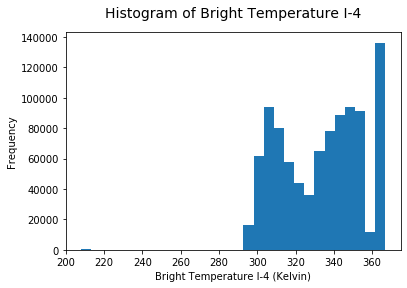

In [4]:
# Visualize the distribution of Brightness temperature I-4 as a histogram.
plt.figure()
plt.hist(df.bright_ti4, bins = 30)
plt.xlabel("Bright Temperature I-4 (Kelvin)")
plt.xlim(200, 375)
plt.ylabel("Frequency")
plt.title("Histogram of Bright Temperature I-4", fontsize = 14, pad = 15)

### 2.1 Do a small multiples plot of whether the brightness is saturated

Text(0, 0.5, 'Latitude')

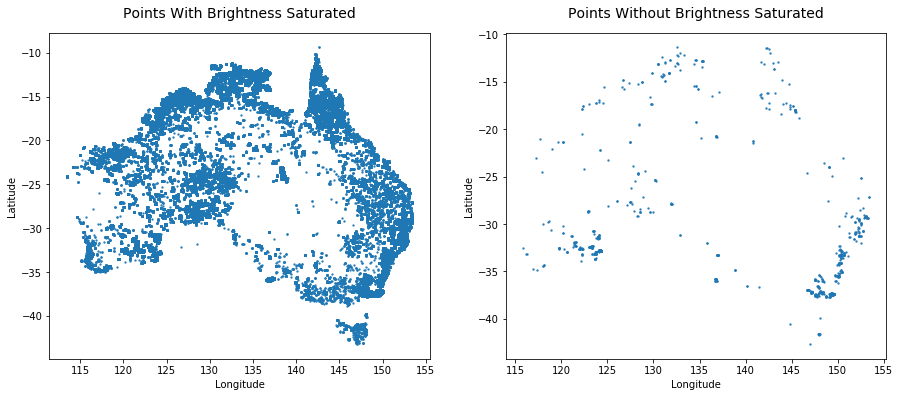

In [5]:
'''
According to the histogram above, we can use 290 Kelvin to separate the points with brightness saturated with those 
are not.

Here, I will use the second method in 1.1, which is the scatter plot with adjested alpha and marker size (1.1 (2)), 
to visualize the data.
'''

fig1, axes1 = plt.subplots(1, 2, figsize = (15, 6))
axes1[0].scatter(df.loc[df.bright_ti4 >= 290].longitude, df.loc[df.bright_ti4 >= 290].latitude, s = 2, alpha = 0.8)
axes1[0].set_title('Points With Brightness Saturated', fontsize = 14, pad = 15)
axes1[0].set_xlabel("Longitude")
axes1[0].set_ylabel("Latitude")

axes1[1].scatter(df.loc[df.bright_ti4 < 290].longitude, df.loc[df.bright_ti4 < 290].latitude, s = 2, alpha = 0.8)
axes1[1].set_title('Points Without Brightness Saturated', fontsize = 14, pad = 15)
axes1[1].set_xlabel("Longitude")
axes1[1].set_ylabel("Latitude")

### Can you spot differences in the distributions?
The points with brightness saturated are distributed more widely than those that are not. Also, points without brightness saturated are on the outer contour of Australia, basically.

### 2.2 Plot both groups in the same axes with different colors

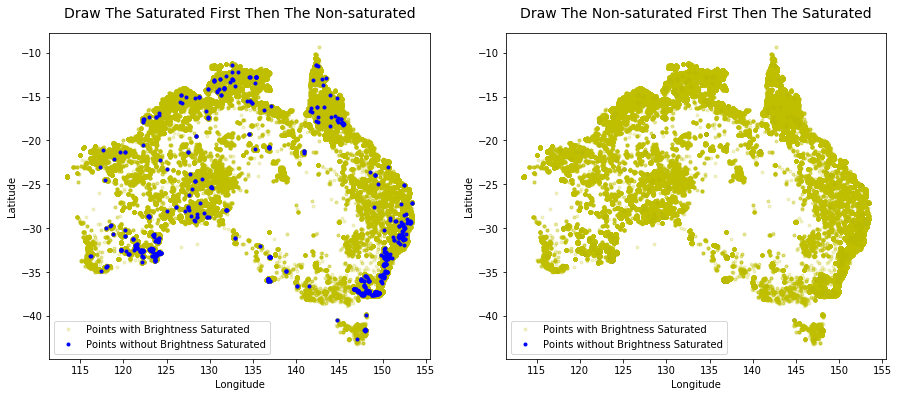

In [6]:
fig2, axes2 = plt.subplots(1, 2, figsize = (15, 6))

# Draw the saturated first then the non-saturated.
axes2[0].plot(df.loc[df.bright_ti4 >= 280].longitude, 
              df.loc[df.bright_ti4 >= 280].latitude, 
              'o', c = 'y', alpha = 0.2, markersize = 3,
              label = 'Points with Brightness Saturated')
axes2[0].plot(df.loc[df.bright_ti4 < 280].longitude, 
              df.loc[df.bright_ti4 < 280].latitude, 
              'o', c = 'b', markersize = 3,
              label = 'Points without Brightness Saturated')
axes2[0].set_title('Draw The Saturated First Then The Non-saturated', fontsize = 14, pad = 15)
axes2[0].set_xlabel("Longitude")
axes2[0].set_ylabel("Latitude")
axes2[0].legend(loc = 'best')


# Draw the non-saturated first then the saturated.
axes2[1].plot(df.loc[df.bright_ti4 < 280].longitude, 
              df.loc[df.bright_ti4 < 280].latitude, 
              'o', c = 'b', markersize = 3,
              label = 'Points without Brightness Saturated')
axes2[1].plot(df.loc[df.bright_ti4 >= 280].longitude, 
              df.loc[df.bright_ti4 >= 280].latitude, 
              'o', c = 'y', alpha = 0.2, markersize = 3,
              label = 'Points with Brightness Saturated')
axes2[1].set_title('Draw The Non-saturated First Then The Saturated', fontsize = 14, pad = 15)
axes2[1].set_xlabel("Longitude")
axes2[1].set_ylabel("Latitude")

# Reorder the legend so that it can match the order of the first plot.
handles, labels = axes2[1].get_legend_handles_labels()
# Sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key = lambda t: t[0]))
axes2[1].legend(handles, labels)

### How does that impact the result?

Since the distribution of the points with brightness saturated covers the distribution of the points without brightness saturated basically, if we plot the points with brightness saturated first, then it's easy for us to compare the distributions of these two kinds of points. However, if we plot the points without brightness saturated first, then after plotting the points with brightness saturated those points plotted before are not visible.

### 2.3 Can you find a better way to compare the two distributions?

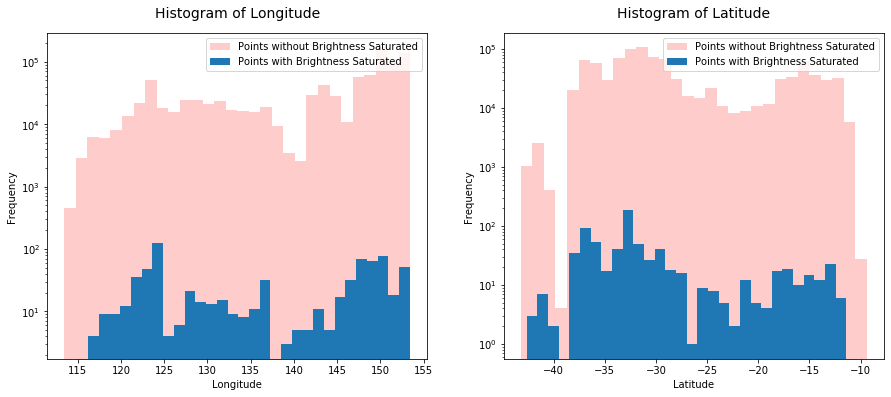

In [7]:
'''
We can compare the distributions of this two kinds of points by latitude and longitude separately.
'''

# By longitude.
fig3, axes3 = plt.subplots(1, 2, figsize = (15, 6))
axes3[0].hist(df.loc[df.bright_ti4 >= 280].longitude, bins = 30, log = True, 
              alpha = 0.2, color = 'r', label = 'Points without Brightness Saturated')
axes3[0].hist(df.loc[df.bright_ti4 < 280].longitude, bins = 30, log = True, 
              alpha = 1, label = 'Points with Brightness Saturated')
axes3[0].set_title('Histogram of Longitude', fontsize = 14, pad = 15)
axes3[0].set_xlabel("Longitude")
axes3[0].set_ylabel("Frequency")
axes3[0].legend(loc = 'upper right')

# By latitude.
axes3[1].hist(df.loc[df.bright_ti4 >= 280].latitude, bins = 30, log = True, 
              alpha = 0.2, color = 'r', label = 'Points without Brightness Saturated')
axes3[1].hist(df.loc[df.bright_ti4 < 280].latitude, bins = 30, log = True, 
              alpha = 1, label = 'Points with Brightness Saturated')
axes3[1].set_title('Histogram of Latitude', fontsize = 14, pad = 15)
axes3[1].set_xlabel("Latitude")
axes3[1].set_ylabel("Frequency")
axes3[1].legend(loc = 'upper right')

It's easy to compare the distributions of these two kinds of points via the above two histograms. Because of the huge difference of the number of points, we plot the histograms on a log scale. 

We can see that, no matter the histogram of longitude or the histogram of latitude, the shape of the distributions of the two kinds of points are rough similar to each other. 

After careful observation, we can notice that most of the points with bightness saturated are located at 150~155 degree longitude, and -35~-30 as well as -15 degree latitude. Most of the points without bightness saturated are located at around 125 degree longitude, and around -33 degree latitude. Also, the number of the points with brightness saturated is far greater than the number of the points without brightness saturated.